In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('UPIData.csv')
df=df[::-1]
df['Amount.Of.Transaction.In.Bn']=df['Amount.Of.Transaction.In.Bn']

In [8]:
df.drop(['Month'],axis=1,inplace=True)

In [9]:
df.drop(['Year'],axis=1,inplace=True)

In [10]:
df.drop(['Amount.Of.Transaction'],axis=1,inplace=True)
df


,Month-Year,No.Of.Banks.Using.Upi,Volume.Of.Transaction.in.Mn,Amount.Of.Transaction.In.Bn
42,Aug-16,21,0.093,0.0310
41,Sep-16,25,0.085,0.3260
40,Oct-16,26,0.103,0.4860
39,Nov-16,30,0.285,1.0050
38,Dec-16,35,1.967,7.0620
37,Jan-17,36,4.153,16.5880
36,Feb-17,44,4.156,19.0210
35,Mar-17,44,6.161,23.9140
34,Apr-17,48,7.005,22.4080
33,May-17,49,9.168,27.6540


In [11]:
x=df['Month-Year']
y=df['No.Of.Banks.Using.Upi']
y

42     21
41     25
40     26
39     30
38     35
37     36
36     44
35     44
34     48
33     49
32     52
31     53
30     55
29     57
28     60
27     61
26     67
25     71
24     86
23     91
22     97
21    101
20    110
19    114
18    114
17    122
16    128
15    128
14    129
13    134
12    139
11    142
10    144
9     143
8     142
7     143
6     141
5     141
4     141
3     143
2     143
1     144
0     146
Name: No.Of.Banks.Using.Upi, dtype: int64

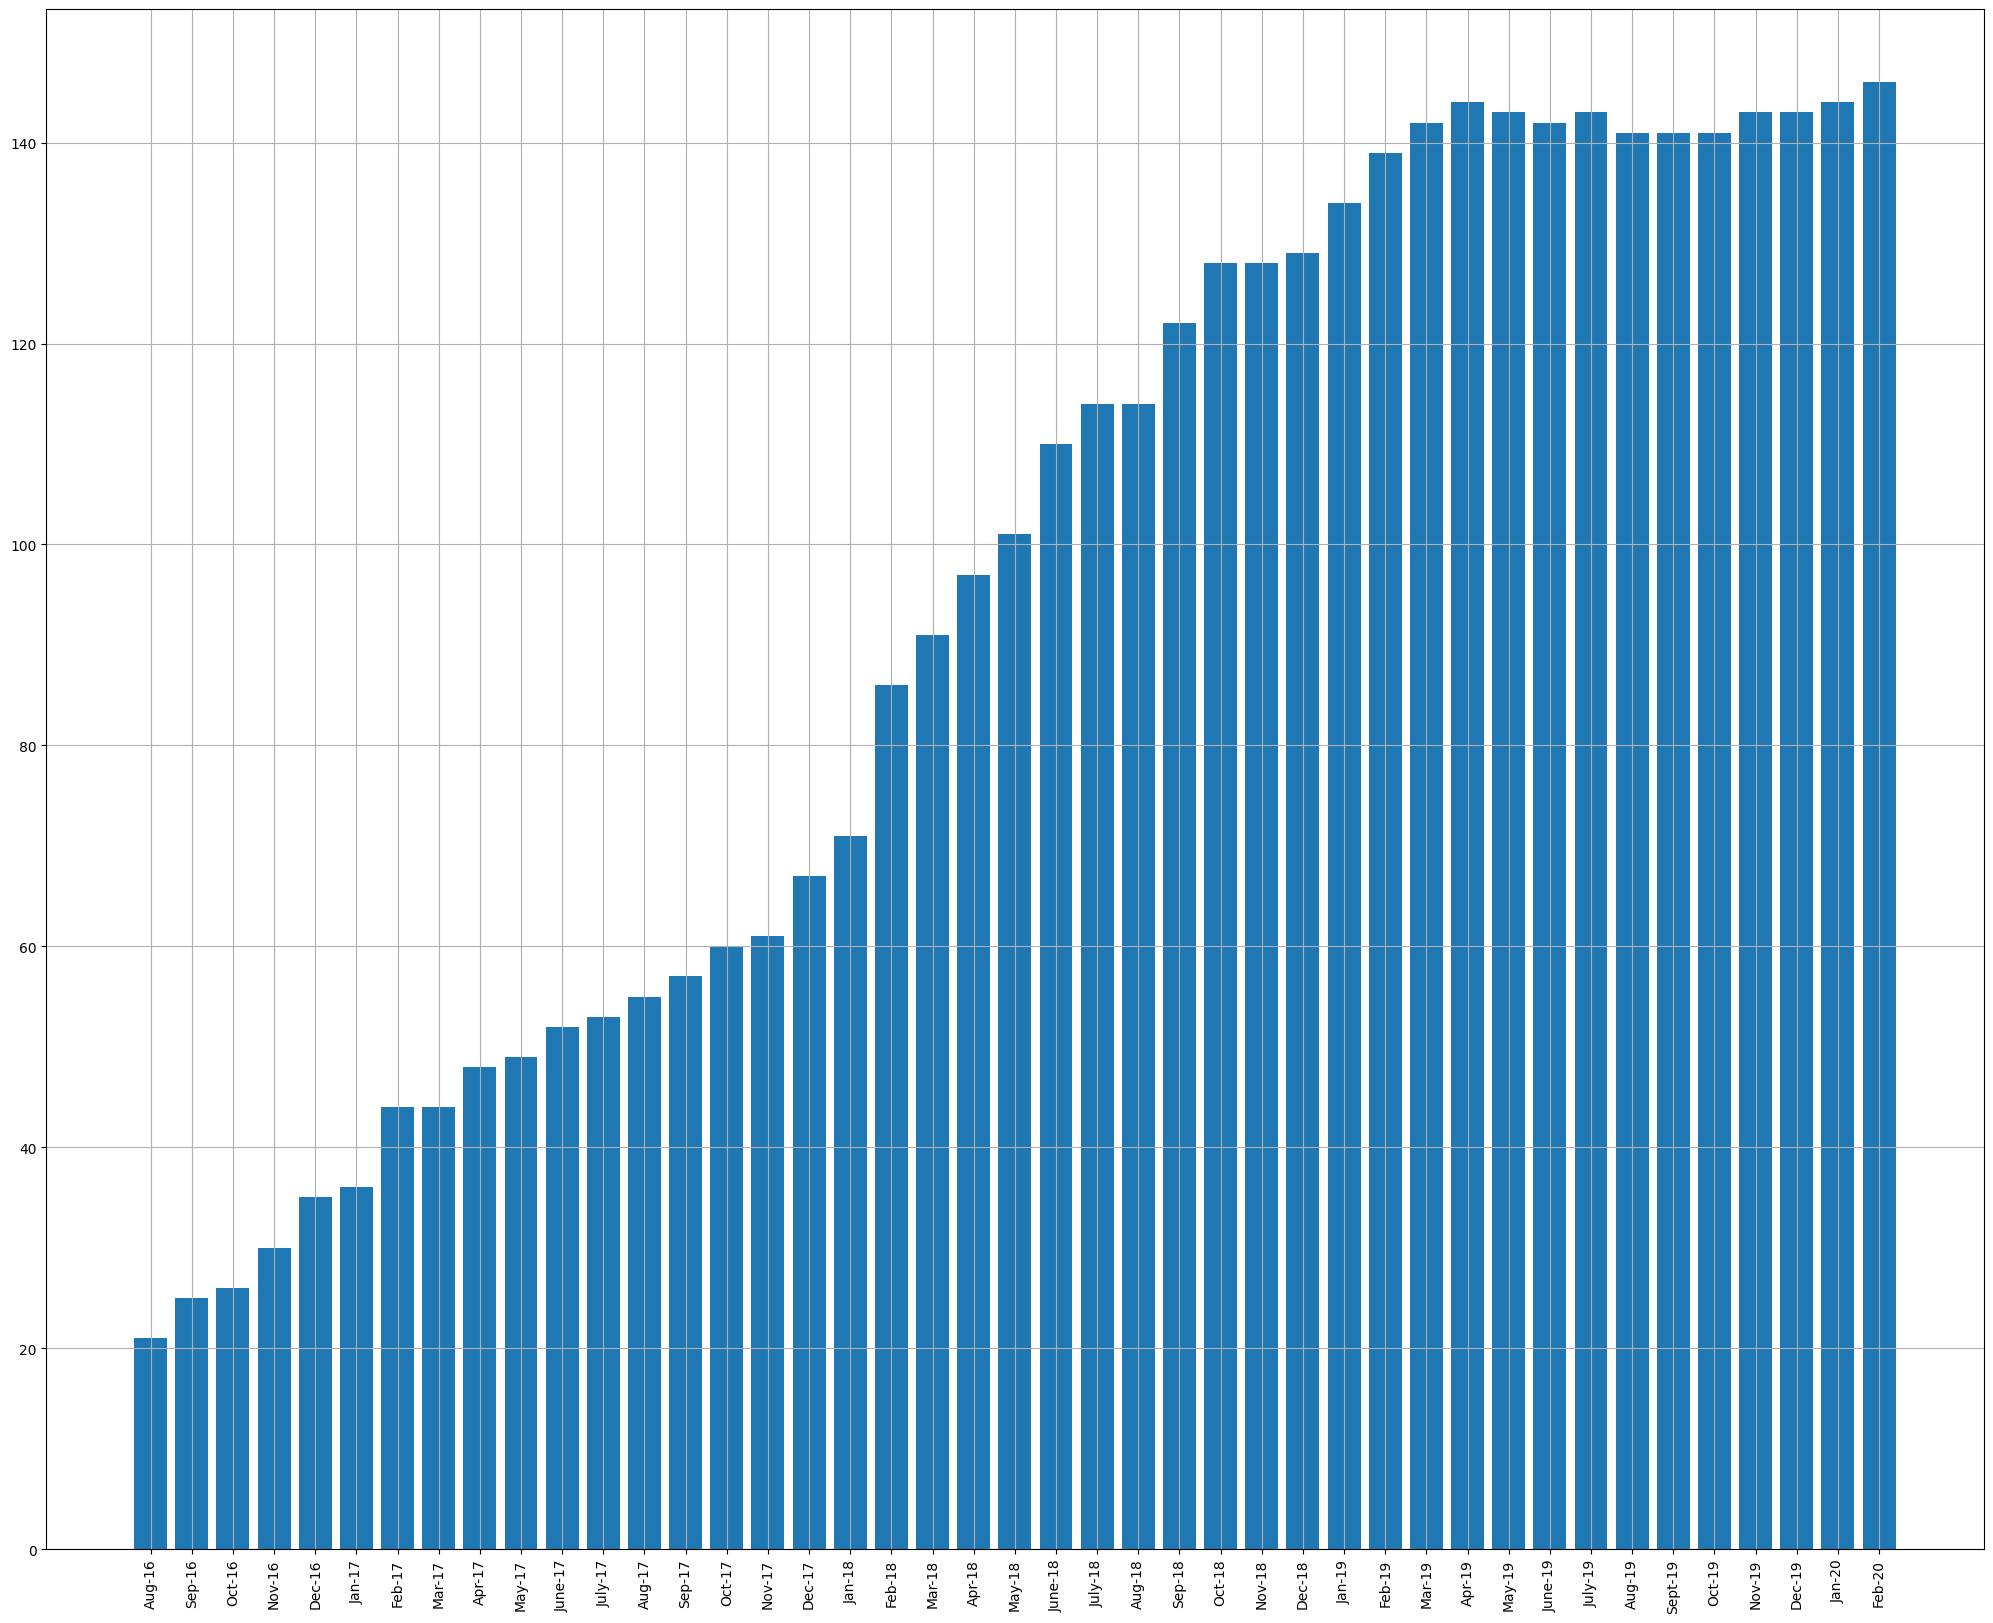

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

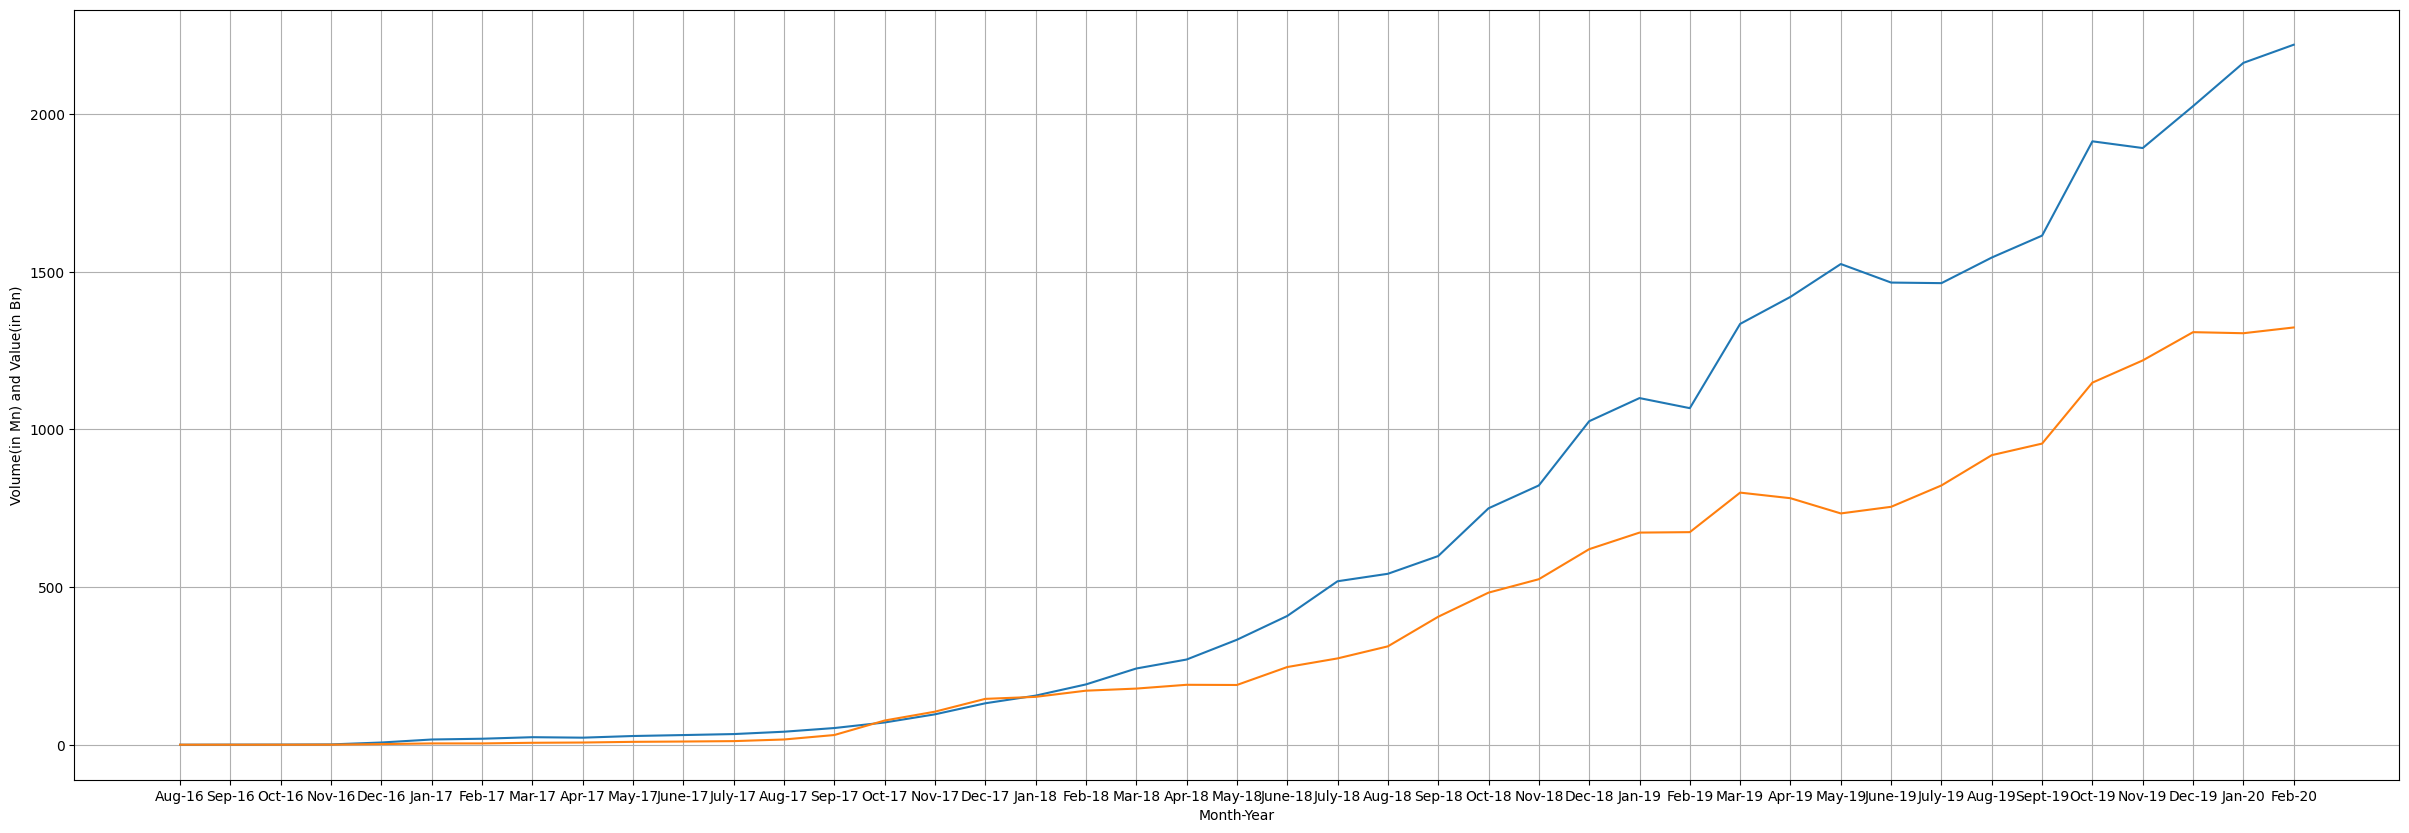

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(df['Month-Year'],df['Amount.Of.Transaction.In.Bn'])
plt.plot(df['Month-Year'],df['Volume.Of.Transaction.in.Mn'])
plt.xlabel("Month-Year")
plt.ylabel("Volume(in Mn) and Value(in Bn)")
plt.show()

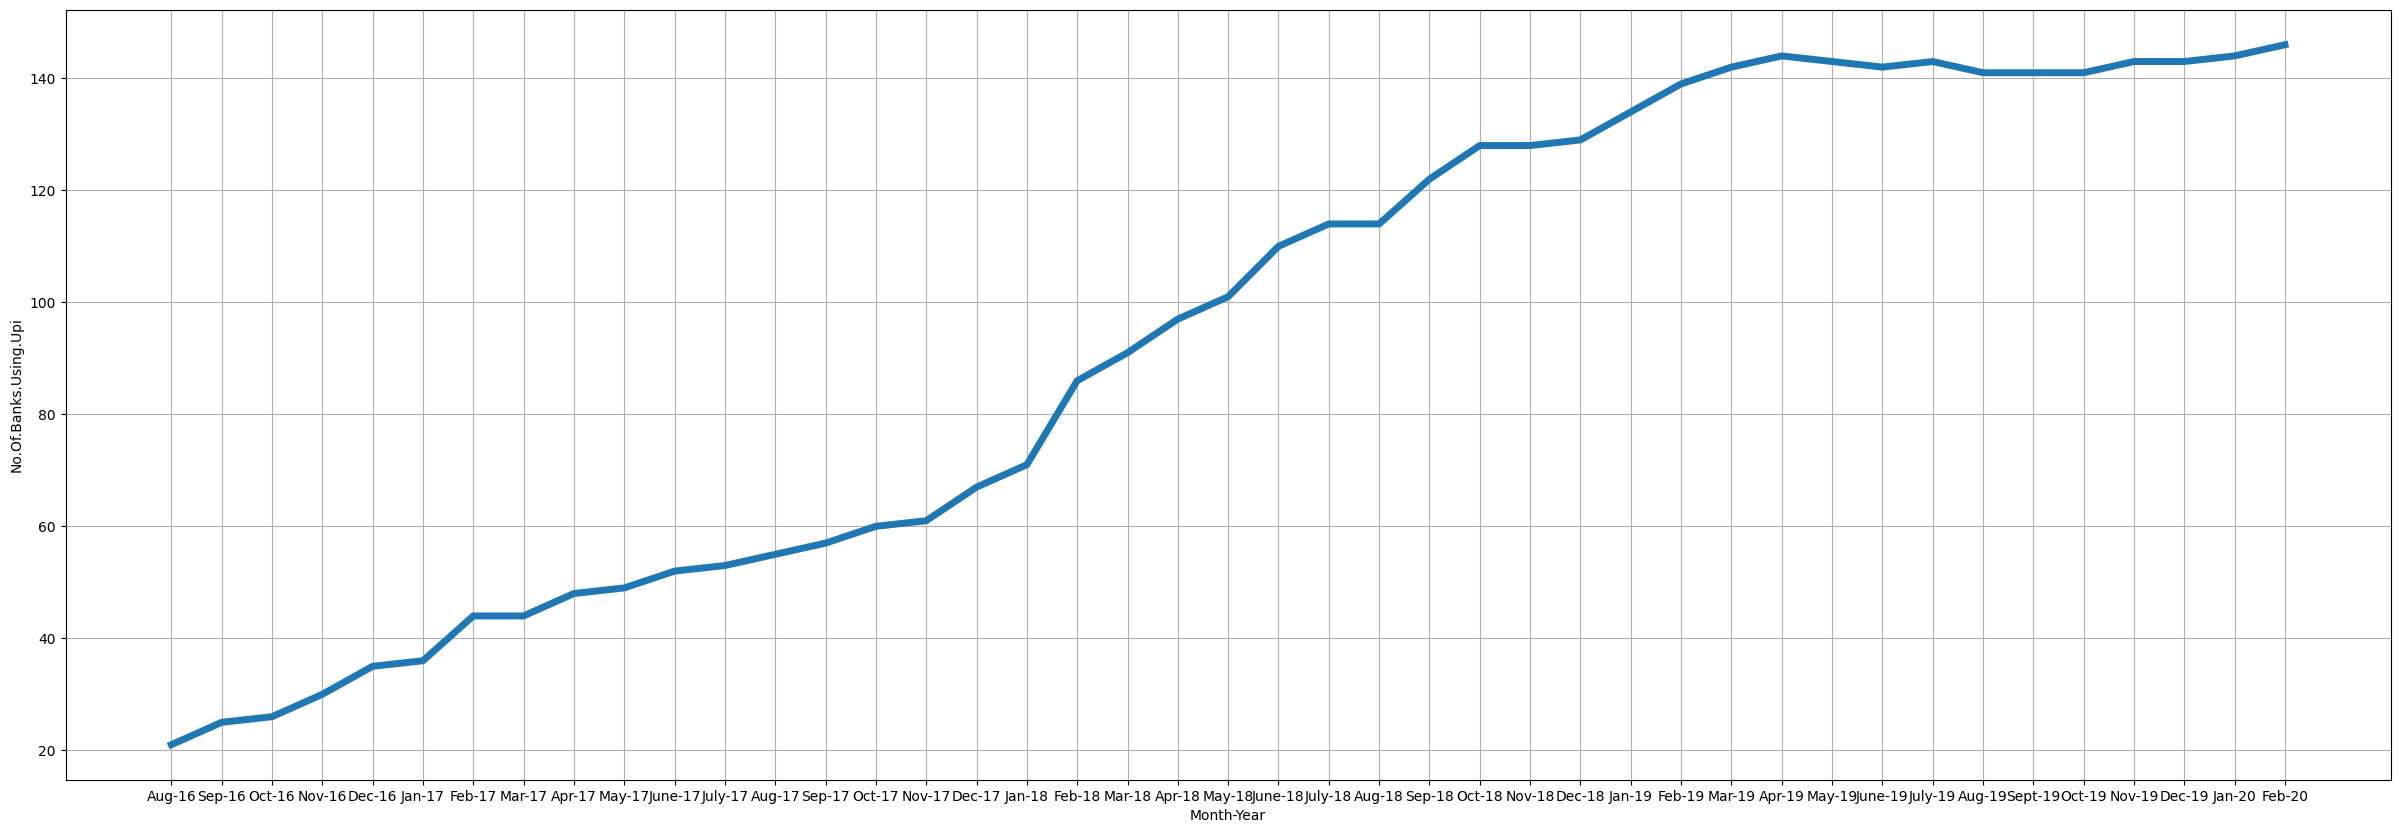

In [13]:

plt.figure(figsize=(30,10))
plt.grid()
sns.lineplot(x="Month-Year", y="No.Of.Banks.Using.Upi", data=df,lw=5)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
x=df[['Volume.Of.Transaction.in.Mn']]
y=df['No.Of.Banks.Using.Upi']
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.2,random_state=42)
polyRegs=PolynomialFeatures(degree=2)
poly=PolynomialFeatures(degree=3)
X_trainPoly=poly.fit_transform(trainX)
X_testPoly=poly.fit_transform(testX)

In [15]:
df2=df.drop(['Month-Year'],axis=1)
df2.corr()

,No.Of.Banks.Using.Upi,Volume.Of.Transaction.in.Mn,Amount.Of.Transaction.In.Bn
No.Of.Banks.Using.Upi,1.000000,0.881116,0.886029
Volume.Of.Transaction.in.Mn,0.881116,1.000000,0.994077
Amount.Of.Transaction.In.Bn,0.886029,0.994077,1.000000


In [16]:
model=LinearRegression()
model.fit(X_trainPoly,trainY)

LinearRegression()

In [17]:
y_trainPred=model.predict(X_trainPoly)
y_testPred=model.predict(X_testPoly)
y_testPred

array([138.71394894, 112.7395539 , 124.48972553, 139.01064505,
       139.82145932, 140.68314239,  37.23876257,  42.31549058,
        39.00472729])

In [18]:
r2=r2_score(y_testPred,testY)
r2

0.9847731889338625

In [19]:
mse=mean_squared_error(testY,y_testPred)
mse


30.434295220822964

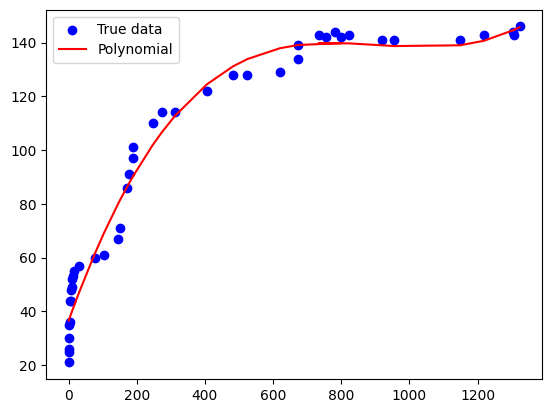

In [20]:
plt.scatter(x,y,color="blue",label="True data")
plt.plot(x,model.predict(poly.transform(x)),color="red",label="Polynomial")
plt.legend()
plt.show()

In [21]:
df2=df.drop(['Month-Year'],axis=1)
df2.corr()

,No.Of.Banks.Using.Upi,Volume.Of.Transaction.in.Mn,Amount.Of.Transaction.In.Bn
No.Of.Banks.Using.Upi,1.000000,0.881116,0.886029
Volume.Of.Transaction.in.Mn,0.881116,1.000000,0.994077
Amount.Of.Transaction.In.Bn,0.886029,0.994077,1.000000
